In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import PIL.Image as Image

In [2]:
import pathlib
data_dir=pathlib.Path('potato_diseases')

In [3]:
data_dir

WindowsPath('potato_diseases')

In [4]:
list(data_dir.glob('*/*'))[:5]

[WindowsPath('potato_diseases/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'),
 WindowsPath('potato_diseases/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG'),
 WindowsPath('potato_diseases/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG'),
 WindowsPath('potato_diseases/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG'),
 WindowsPath('potato_diseases/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG')]

In [5]:
len(list(data_dir.glob('*/*')))

2152

In [6]:
len(list(data_dir.glob('*/*.JPG')))

2152

## Data Visualization

In [7]:
healthy=list(data_dir.glob('Potato___healthy/*'))

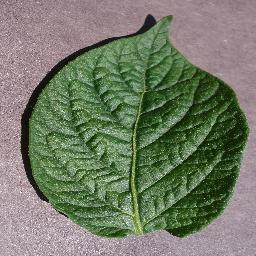

In [8]:
Image.open(str(healthy[0]))

In [9]:
early_blight=list(data_dir.glob('Potato___Early_blight/*'))

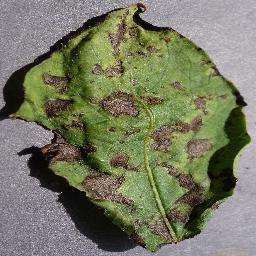

In [10]:
Image.open(str(early_blight[0]))

In [11]:
late_blight=list(data_dir.glob('Potato___Late_blight/*'))

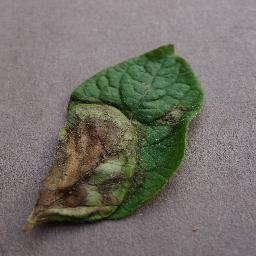

In [12]:
Image.open(str(late_blight[0]))

## Data preprocessing

In [13]:
potato_diseases_dic={
    'healthy':list(data_dir.glob('Potato___healthy/*')),
    'early_blight':list(data_dir.glob('Potato___Early_blight/*')),
    'late_blight':list(data_dir.glob('Potato___Late_blight/*'))
}

In [14]:
labels_dic={
    'healthy':0,
    'early_blight':1,
    'late_blight':2
}

In [15]:
img1=cv2.imread(str(potato_diseases_dic['healthy'][0]))
img1.shape

(256, 256, 3)

In [16]:
img2=cv2.imread(str(potato_diseases_dic['healthy'][1]))
img2.shape

(256, 256, 3)

In [17]:
img3=cv2.imread(str(potato_diseases_dic['early_blight'][1]))
img3.shape

(256, 256, 3)

In [18]:
X=[]
y=[]
for potato_disease,images in potato_diseases_dic.items():
    for img in images:
        img=cv2.imread(str(img))
        img=cv2.resize(img,(256,256))
        X.append(img)
        y.append(labels_dic[potato_disease])

In [19]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(2152, 256, 256, 3)
(2152,)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=0)

In [21]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

## Building the model

In [27]:
model=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
61/61 [==============================] - 52s 786ms/step - loss: 1.4516 - accuracy: 0.7433
Epoch 2/5
61/61 [==============================] - 47s 777ms/step - loss: 0.2154 - accuracy: 0.9230
Epoch 3/5
61/61 [==============================] - 49s 799ms/step - loss: 0.1054 - accuracy: 0.9649
Epoch 4/5
61/61 [==============================] - 46s 752ms/step - loss: 0.0560 - accuracy: 0.9814
Epoch 5/5
61/61 [==============================] - 46s 759ms/step - loss: 0.0316 - accuracy: 0.9917


In [28]:
model.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 4s 144ms/step - loss: 0.3361 - accuracy: 0.9074


[0.336126446723938, 0.9074074029922485]

## Dropout regularization

In [64]:
model1=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')
])
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model1.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
61/61 [==============================] - 50s 801ms/step - loss: 1.9836 - accuracy: 0.7443
Epoch 2/5
61/61 [==============================] - 50s 814ms/step - loss: 0.2098 - accuracy: 0.9292
Epoch 3/5
61/61 [==============================] - 51s 844ms/step - loss: 0.0712 - accuracy: 0.9762
Epoch 4/5
61/61 [==============================] - 54s 877ms/step - loss: 0.0787 - accuracy: 0.9747
Epoch 5/5
61/61 [==============================] - 51s 833ms/step - loss: 0.0397 - accuracy: 0.9861


In [70]:
model1.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 1s 154ms/step - loss: 0.3068 - accuracy: 0.9213


[0.30677101016044617, 0.9212962985038757]

## Data Augmentation

In [54]:
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomFlip('horizontal')
])

In [56]:
model2=Sequential([ 
    data_augmentation,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')
])
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model2.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
58/58 [==============================] - 53s 862ms/step - loss: 1.9320 - accuracy: 0.7064
Epoch 2/5
58/58 [==============================] - 48s 835ms/step - loss: 0.3465 - accuracy: 0.8688
Epoch 3/5
58/58 [==============================] - 48s 834ms/step - loss: 0.3316 - accuracy: 0.8759
Epoch 4/5
58/58 [==============================] - 49s 837ms/step - loss: 0.2389 - accuracy: 0.9076
Epoch 5/5
58/58 [==============================] - 49s 838ms/step - loss: 0.2386 - accuracy: 0.9054


In [69]:
model2.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 1s 142ms/step - loss: 0.4831 - accuracy: 0.8426


[0.48314306139945984, 0.8425925970077515]

## Classification Report

In [29]:
y_pred=model.predict(X_test_scaled)

7/7 [==============================] - 3s 143ms/step


In [30]:
y_pred=[np.argmax(i) for i in y_pred]

In [31]:
y_test

array([1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0,
       2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1,
       2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.98      0.90      0.94       101
           2       0.84      0.98      0.91       100

    accuracy                           0.91       216
   macro avg       0.94      0.78      0.83       216
weighted avg       0.92      0.91      0.90       216



- Recall for class 0 is low.Let's try to use transfert learning.

## Transfert Learning

In [22]:
X1=[]
y1=[]
for potato_disease,images in potato_diseases_dic.items():
    for img in images:
        img=cv2.imread(str(img))
        img=cv2.resize(img,(224,224))
        X1.append(img)
        y1.append(labels_dic[potato_disease])
X1=np.array(X1)
y1=np.array(y1)
print(X1.shape)
print(y1.shape)

(2152, 224, 224, 3)
(2152,)


In [23]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.1,stratify=y,random_state=0)

In [24]:
X_train_scaled1=X_train1/255
X_test_scaled1=X_test1/255

In [25]:
import tensorflow_hub as hub

In [33]:
model3 = tf.keras.Sequential([
     hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/2",input_shape=(224,224,3),trainable=False),
     layers.Dense(3, activation='softmax')
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [34]:
model3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model3.fit(X_train_scaled1,y_train,epochs=5)

Epoch 1/5
61/61 [==============================] - 26s 395ms/step - loss: 0.5897 - accuracy: 0.7882
Epoch 2/5
61/61 [==============================] - 25s 410ms/step - loss: 0.1337 - accuracy: 0.9623
Epoch 3/5
61/61 [==============================] - 26s 419ms/step - loss: 0.0921 - accuracy: 0.9778
Epoch 4/5
61/61 [==============================] - 26s 429ms/step - loss: 0.0707 - accuracy: 0.9824
Epoch 5/5
61/61 [==============================] - 27s 439ms/step - loss: 0.0606 - accuracy: 0.9866


In [35]:
model3.evaluate(X_test_scaled1,y_test1)

7/7 [==============================] - 3s 366ms/step - loss: 0.0711 - accuracy: 0.9769


[0.0711100623011589, 0.9768518805503845]

In [36]:
y_pred1=model3.predict(X_test_scaled1)

7/7 [==============================] - 3s 414ms/step


In [37]:
y_pred1=[np.argmax(i) for i in y_pred1]

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.99      0.99      0.99       101
           2       0.96      0.99      0.98       100

    accuracy                           0.98       216
   macro avg       0.98      0.93      0.95       216
weighted avg       0.98      0.98      0.98       216



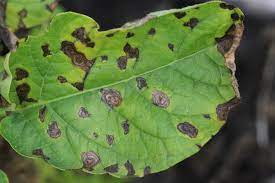

In [39]:
Image.open('potato_img2.jpg')

In [40]:
img_potato=cv2.imread('potato_img2.jpg')
img_potato_resized=cv2.resize(img_potato,(224,224))
img_potato_scaled=img_potato_resized/255
img_potato_cl=img_potato_scaled[np.newaxis, ...]
pred=model3.predict(img_potato_cl)
result=np.argmax(pred)
if result==0:
    print('healthy potato')
elif result==1:
    print('unhealthy potato:early blight')
else:
    print('unhealthy potato:late blight')

1/1 [==============================] - 0s 56ms/step
unhealthy potato:early blight


## Saving the model

In [41]:
model3.save('potato_model.h5')

In [42]:
from tensorflow.keras.models import load_model
model4=load_model('potato_model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [43]:
pred1=model4.predict(img_potato_cl)
result1=np.argmax(pred)
if result1==0:
    print('healthy potato')
elif result1==1:
    print('unhealthy potato:early blight')
else:
    print('unhealthy potato:late blight')

1/1 [==============================] - 0s 357ms/step
unhealthy potato:early blight
